### IMPORTING LIBRARIES

Let's start by importing the required libraries...

In [30]:
pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.2/157.2 kB 2.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 21.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.4/313.4 kB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 17.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 14.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 16.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.1/103.1 kB 3.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [40]:
import pandas as pd
import matplotlib.pyplot as plt
from itertools import *

### TASK 1

Function renamevars (df, dict_names)
Rename variables on a given dataframe df. The function returns a df who’s columns
names are as detailed in dict_names
Inputs:
df: a given data frame
dict_names: a dictionary for mapping the actual names of the columns in the dataframe
(each key of the dictionary) to a given new simpler name (i.e. the values of
the dictionary). You can follow the example in the notebook
numpy_pandas_sklearn.ipynb for the Lab 4.
Output:
renamed_df: returns the input dataframe but with the columns renamed as in
dict_names

In [22]:
df = pd.read_csv('parkinsons.data', 
                 dtype = { # indicate categorical variables
                     'status': 'category'})
df.head(5)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [21]:
dict_names = {'MDVP:Fhi(Hz)':'maxFF', 
              'MDVP:Flo(Hz)':'minFF',
              'MDVP:Jitter(%)': 'percJitter',
              'MDVP:Jitter(Abs)':'absJitter' ,
              'MDVP:RAP': 'rap',
              'MDVP:PPQ': 'ppq',
              'Jitter:DDP': 'ddp',
              'MDVP:Shimmer' : 'lShimer',
              'MDVP:Shimmer(dB)': 'dbShimer',
              'Shimmer:APQ3':'apq3',
              'Shimmer:APQ5': 'apq5',
              'MDVP:APQ':'apq',
              'MDVP:Fo(Hz)':'avFF',
              'Shimmer:DDA':'dda'}

In [24]:
def renamevars(df, dict_names):
    df.rename(columns = dict_names, inplace = True)
    renamed_df = df
    return renamed_df

renamed_df = renamevars(df, dict_names)
renamed_df.head(5)

,name,avFF,maxFF,minFF,percJitter,absJitter,rap,ppq,ddp,lShimer,...,dda,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


### TASK 2

Summarize the data after cleaning (that is, after removing some correlations) when the
data is ready. Annotate your observations. For example, how many observations do you
have? Are there apparent differences between controls and patients? Is the variability
comparable? If you check the minimum and maximum values are there outliers? If so,
what will you do with them?

In [66]:
def calculate_correlation(df):
    # Select numerical columns only
    numerical_df = df.select_dtypes(include='number')

    # Drop columns with all NaN values
    numerical_df = numerical_df.dropna(axis=1, how='all')

    # Create an empty DataFrame to store correlation coefficients
    correlation_df = pd.DataFrame(index=numerical_df.columns, columns=numerical_df.columns)

    # Calculate correlation coefficients including self-correlation
    for col1, col2 in product(numerical_df.columns, repeat=2):
        correlation_coefficient = numerical_df[col1].corr(numerical_df[col2])
        correlation_df.loc[col1, col2] = correlation_coefficient

    return correlation_df

def plot_scatter(df, col1, col2, corr):
    plt.scatter(df[col1], df[col2])
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.title(f'Corr {corr} of: {col1} vs {col2}')
    plt.show()

def visualize_high_correlation(correlation_df, threshold):
    high_corr_pairs = []

    for col1 in correlation_df.columns:
        for col2 in correlation_df.index:
            correlation_coefficient = correlation_df.loc[col1, col2]
            if abs(correlation_coefficient) > threshold and col1 != col2 and ((col1, col2) not in high_corr_pairs and (col2, col1) not in high_corr_pairs): # Only adding those instances that havn't been already introduced, but in a different column order
                high_corr_pairs.append((col1, col2))
                plot_scatter(df, col1, col2, correlation_coefficient)

    return high_corr_pairs

In [52]:
correlation_df = calculate_correlation(renamed_df)
correlation_df.head()

,avFF,maxFF,minFF,percJitter,absJitter,rap,ppq,ddp,lShimer,dbShimer,...,apq,dda,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
avFF,1.0,0.400985,0.596546,-0.118003,-0.382027,-0.076194,-0.112165,-0.076213,-0.098374,-0.073742,...,-0.077774,-0.094732,-0.021981,0.059144,-0.383894,-0.446013,-0.413738,-0.24945,0.17798,-0.372356
maxFF,0.400985,1.0,0.084951,0.102086,-0.029198,0.097177,0.091126,0.09715,0.002281,0.043465,...,0.004937,-0.003733,0.163766,-0.024893,-0.112404,-0.343097,-0.076658,-0.002954,0.176323,-0.069543
minFF,0.596546,0.084951,1.0,-0.139919,-0.277815,-0.100519,-0.095828,-0.100488,-0.144543,-0.119089,...,-0.107293,-0.150737,-0.10867,0.210851,-0.400143,-0.050406,-0.394857,-0.243829,-0.100629,-0.340071
percJitter,-0.118003,0.102086,-0.139919,1.0,0.935714,0.990276,0.974256,0.990276,0.769063,0.804289,...,0.758255,0.746635,0.906959,-0.728165,0.360673,0.098572,0.693577,0.385123,0.433434,0.721543
absJitter,-0.382027,-0.029198,-0.277815,0.935714,1.0,0.922911,0.897778,0.922913,0.703322,0.716601,...,0.648793,0.69717,0.834972,-0.65681,0.441839,0.175036,0.735779,0.388543,0.310694,0.748162


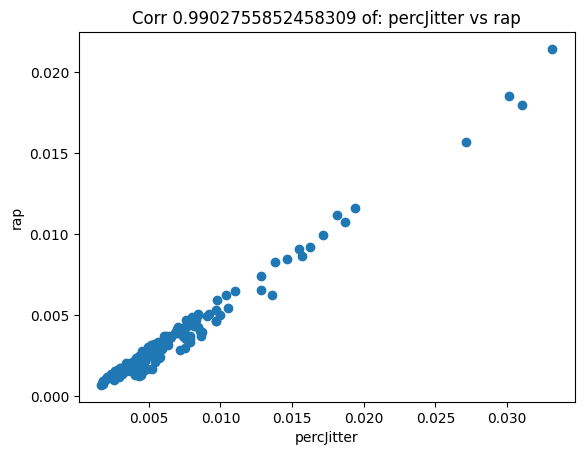

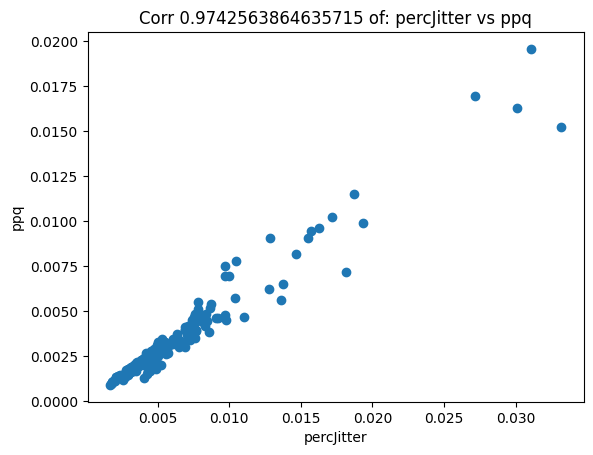

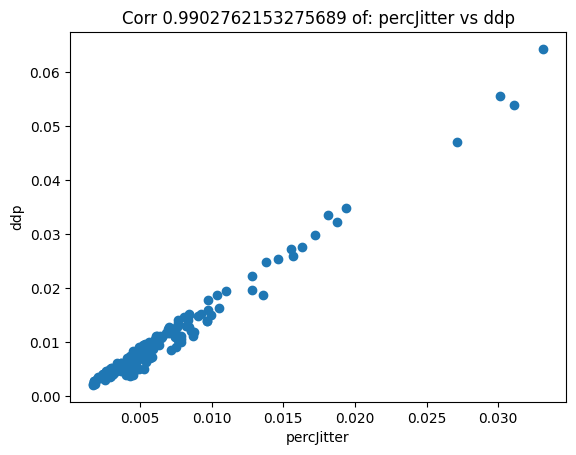

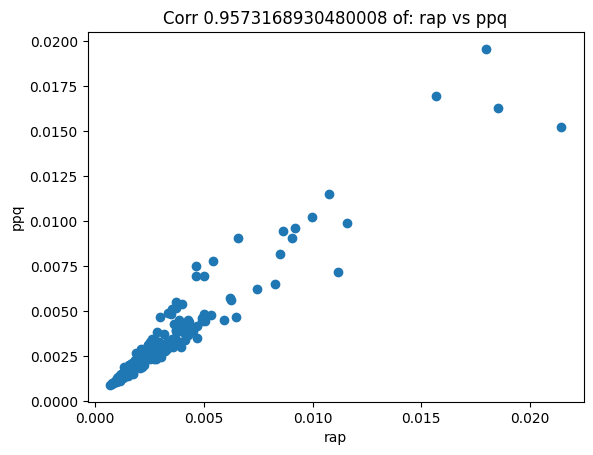

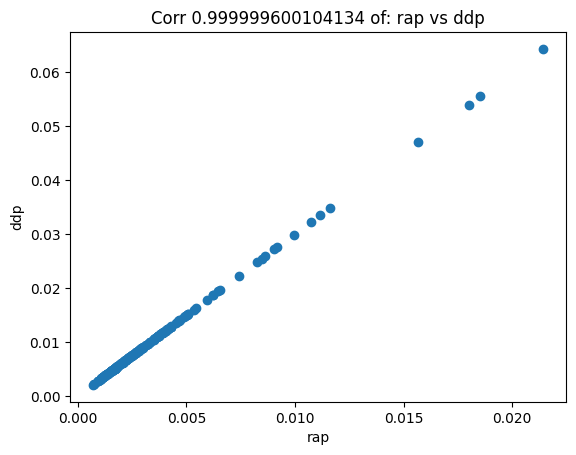

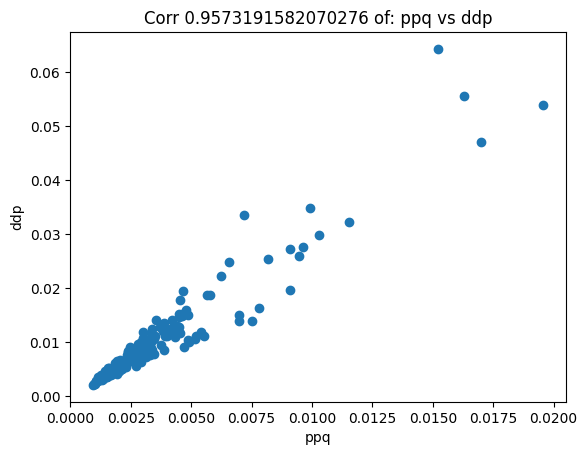

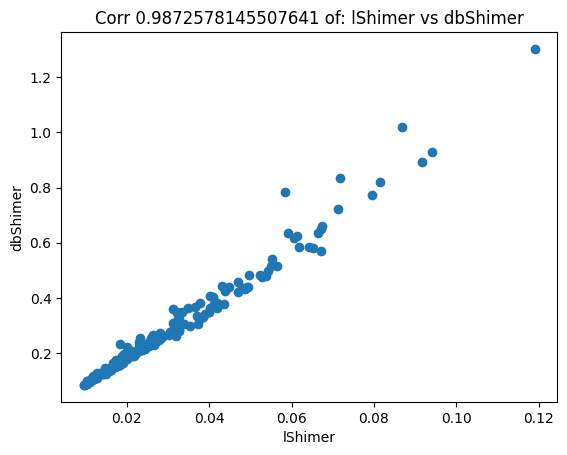

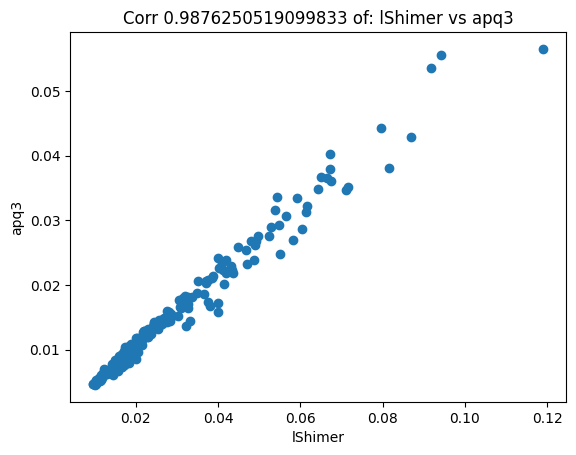

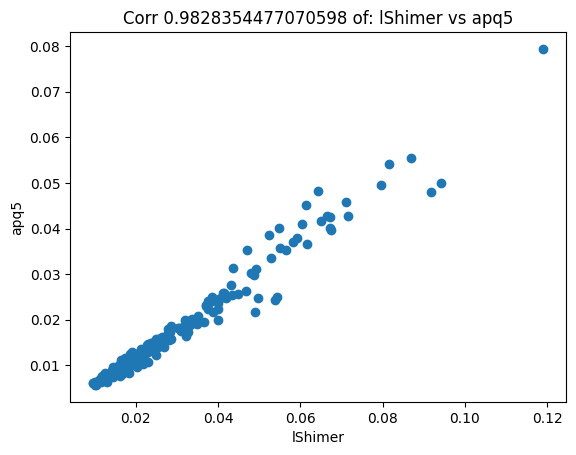

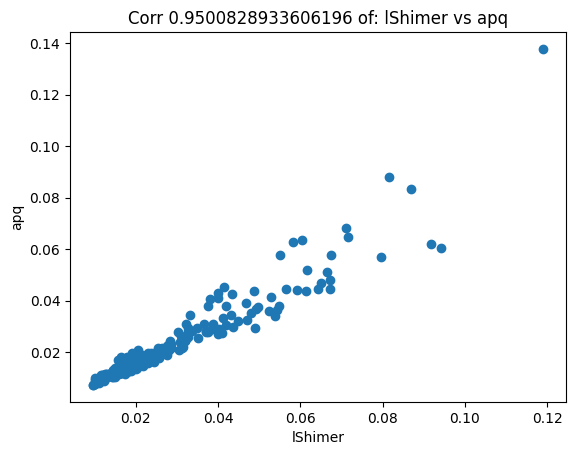

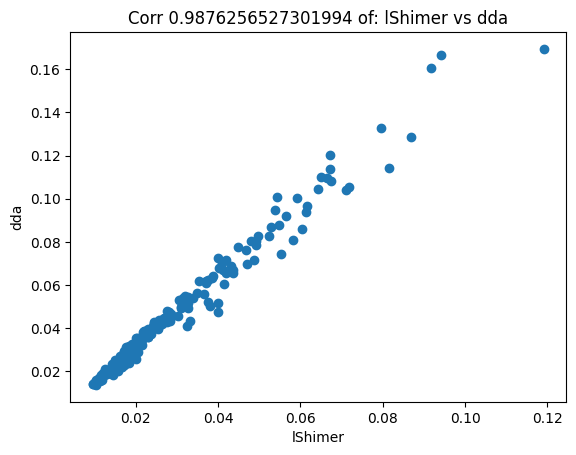

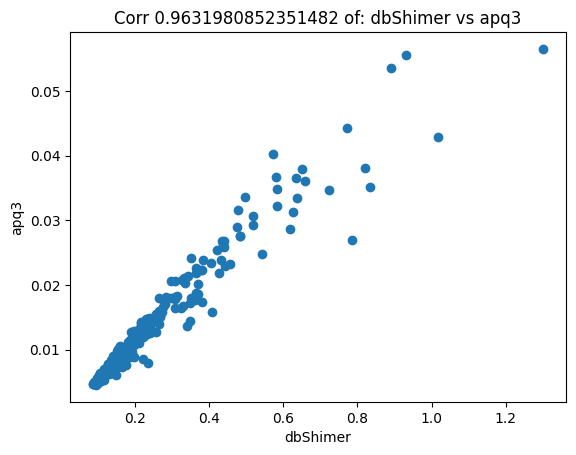

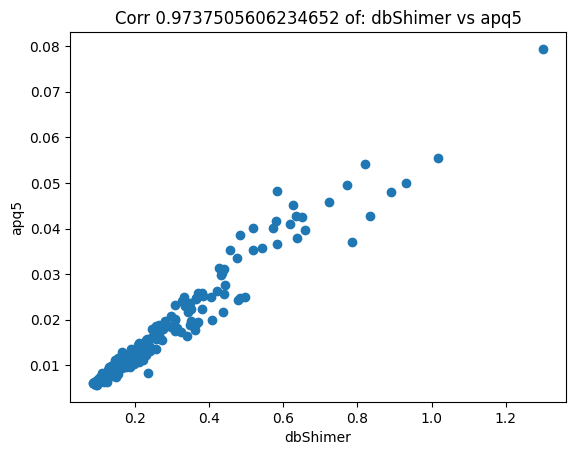

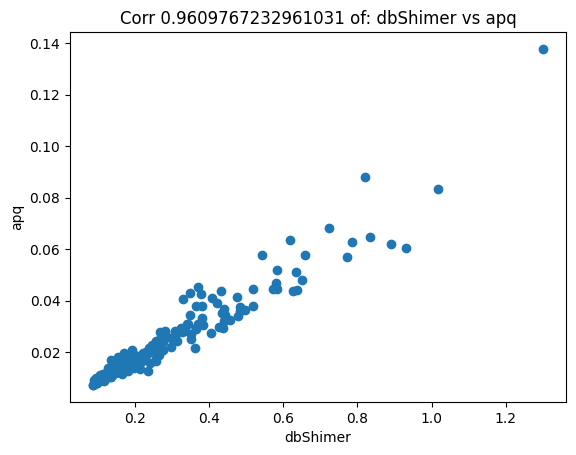

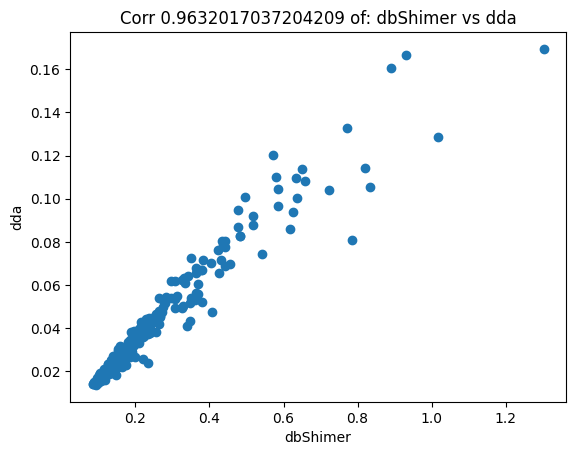

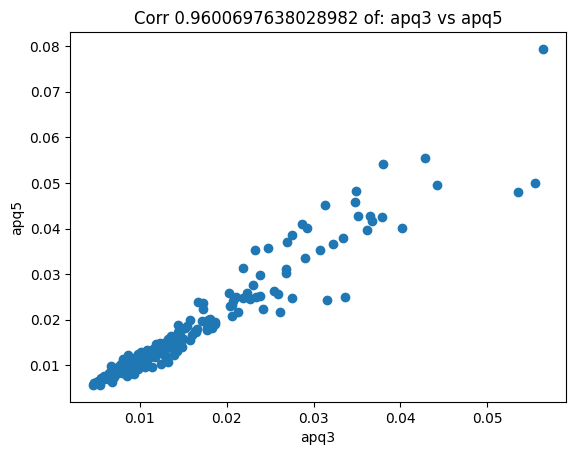

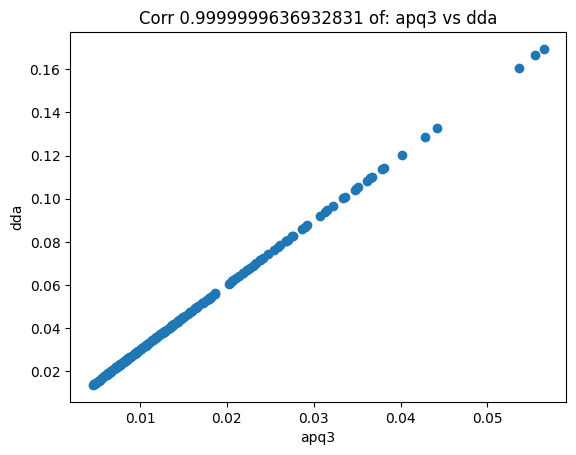

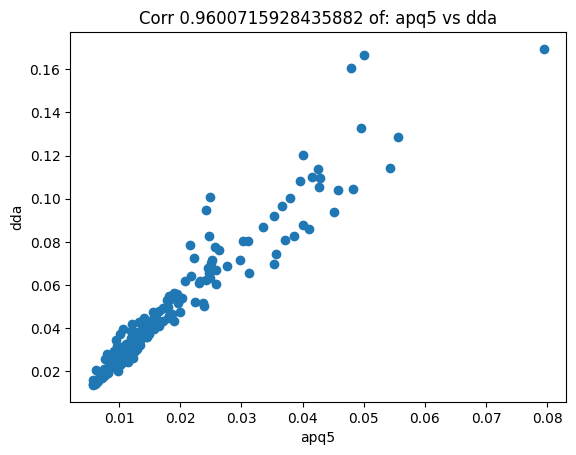

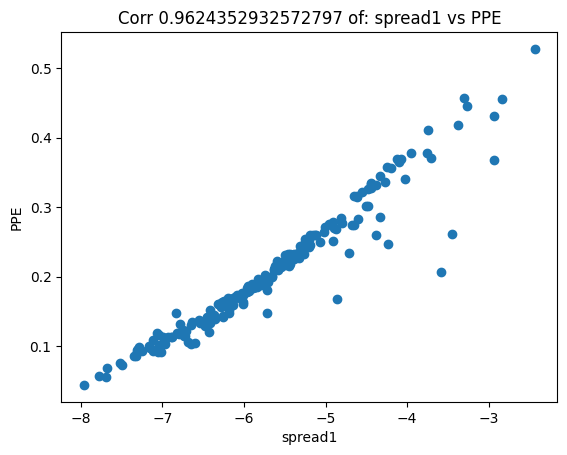

[('percJitter', 'rap'),
 ('percJitter', 'ppq'),
 ('percJitter', 'ddp'),
 ('rap', 'ppq'),
 ('rap', 'ddp'),
 ('ppq', 'ddp'),
 ('lShimer', 'dbShimer'),
 ('lShimer', 'apq3'),
 ('lShimer', 'apq5'),
 ('lShimer', 'apq'),
 ('lShimer', 'dda'),
 ('dbShimer', 'apq3'),
 ('dbShimer', 'apq5'),
 ('dbShimer', 'apq'),
 ('dbShimer', 'dda'),
 ('apq3', 'apq5'),
 ('apq3', 'dda'),
 ('apq5', 'dda'),
 ('spread1', 'PPE')]

In [67]:
high_corr_pairs = visualize_high_correlation(correlation_df, 0.95)
high_corr_pairs